**Built on Google colab. Best viewed in the dark theme**

In [147]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from pandas import DataFrame as df
import datetime
from tqdm import tqdm
import pandas as pd
pd.set_option('display.max_colwidth', -1)

In [6]:
items=glob.glob('/gdrive/My Drive/Capstone project images/color/Grape*/*.JPG',recursive=True)
data=df(columns=['Item'],data=items)
data['Folder']=data['Item'].str.rsplit('/', 1, expand=True)[0]
data['Folder']=data['Folder'].str.rsplit('/', 1, expand=True)[1]
data['Species']=data['Folder'].str.rsplit('___', 1, expand=True)[0]
data['Disease']=data['Folder'].str.rsplit('___', 1, expand=True)[1]
data['Image Path']=data['Item']
data.drop(['Species','Item','Folder'],axis=1,inplace=True)
data.head()

,Disease,Image Path
0,Esca_(Black_Measles),/gdrive/My Drive/Capstone project images/color/Grape___Esca_(Black_Measles)/460f1783-64fd-4398-9859-25242f4e1614___FAM_B.Msls 1124.JPG
1,Esca_(Black_Measles),/gdrive/My Drive/Capstone project images/color/Grape___Esca_(Black_Measles)/46b1f2e5-daa8-4270-bb0b-aee8c0737e91___FAM_B.Msls 4135.JPG
2,Esca_(Black_Measles),/gdrive/My Drive/Capstone project images/color/Grape___Esca_(Black_Measles)/46cb7bd4-29df-41b7-9c56-8bf84ea8295d___FAM_B.Msls 1126.JPG
3,Esca_(Black_Measles),/gdrive/My Drive/Capstone project images/color/Grape___Esca_(Black_Measles)/46d513d3-a4ff-4ec6-b123-867c3dc15f48___FAM_B.Msls 1174.JPG
4,Esca_(Black_Measles),/gdrive/My Drive/Capstone project images/color/Grape___Esca_(Black_Measles)/47274876-8fe2-4ad8-8e5d-08e3b96ac5d0___FAM_B.Msls 1341.JPG


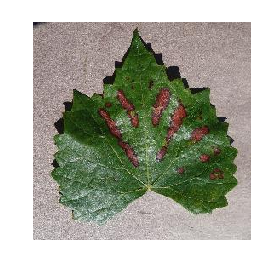

In [7]:
img = cv2.imread(data['Image Path'][0])
color=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [8]:
color=[]
for image in tqdm(data['Image Path']):
    color.append(cv2.imread(image,1))

100%|██████████| 4062/4062 [20:14<00:00,  3.30it/s]


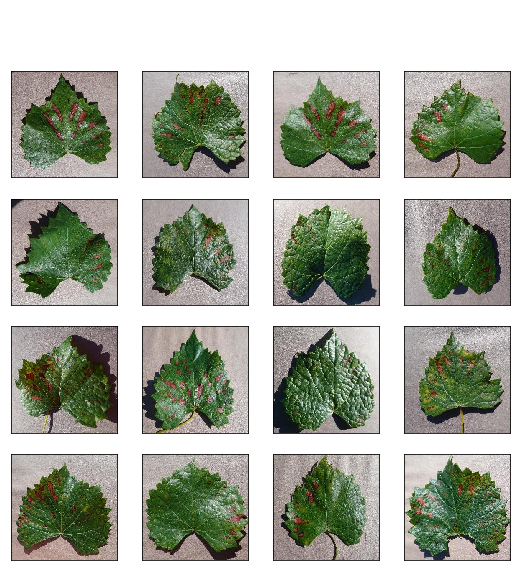

In [34]:
plt.figure(figsize=(9,9))
i=0
for img in color[0:16]:
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  i+=1
plt.suptitle("Color", fontsize=20,color='w')
plt.show()

In [0]:
gray=[]
for img in color:
  gray.append(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))

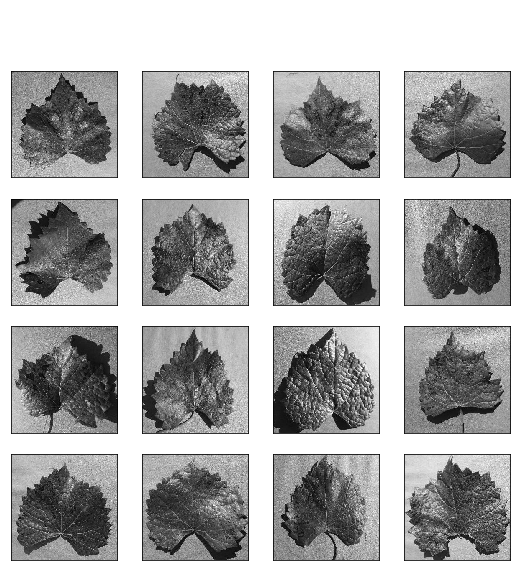

In [50]:
plt.figure(figsize=(9,9))
i=0
for grayimg in gray[0:16]:
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cv2.cvtColor(grayimg, cv2.COLOR_GRAY2RGB))
  i+=1
plt.suptitle("Grayscale", fontsize=20,color='w')
plt.show()

In [0]:
thresh=[]
for grayimg in gray:
  th, threshed = cv2.threshold(grayimg, 127, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
  thresh.append(threshed)

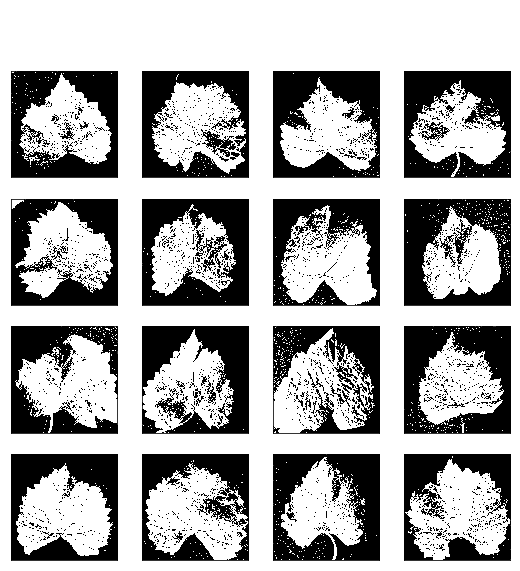

In [104]:
plt.figure(figsize=(9,9))
i=0
for threshimg in thresh[0:16]:
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(threshimg,cmap='gray')
  i+=1
plt.suptitle("Threshold", fontsize=20,color='w')
plt.show()

In [0]:
masked=[]
segmented=[]
i=0
for threshimg in thresh:
  cnts = cv2.findContours(threshimg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
  cnts = sorted(cnts, key=cv2.contourArea,reverse=True)
  cnt=cnts[0]
  mask = np.zeros(color[i].shape[:2],np.uint8)
  masked.append(cv2.drawContours(mask, [cnt],-1, 255, -1))
  cv2.drawContours(mask, [cnt],-1, 255, -1)
  dst = cv2.bitwise_and(color[i], color[i], mask=mask)
  segmented.append(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
  i+=1

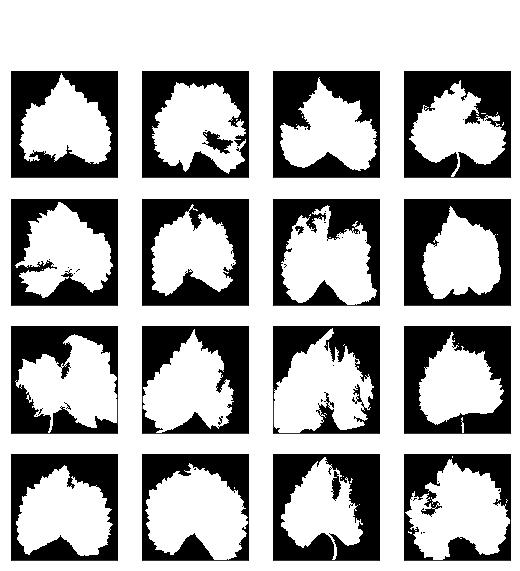

In [77]:
plt.figure(figsize=(9,9))
i=0
for maskimg in masked[0:16]:
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(maskimg,cmap='gray')
  i+=1
plt.suptitle("Mask", fontsize=20,color='w')
plt.show()

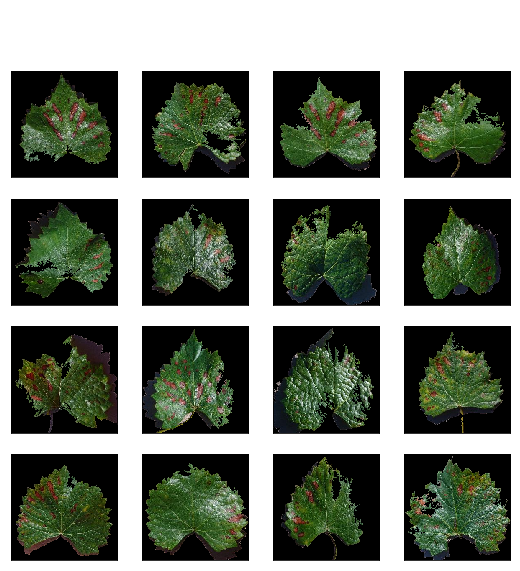

In [86]:
plt.figure(figsize=(9,9))
i=0
for segimg in segmented[0:16]:
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(segimg)
  i+=1
plt.suptitle("Segmented", fontsize=20,color='w')
plt.show()

In [174]:
i=0
for image in tqdm(segmented):
  cv2.imwrite(data['Image Path'][i].rsplit('/',3)[0]+'/masked/'+data['Image Path'][i].rsplit('/',2)[1]+'/'+data['Image Path'][i].rsplit('/',2)[2], cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  i+=1

100%|██████████| 4062/4062 [00:23<00:00, 169.57it/s]
